In [4]:
import sys
sys.path.append('..')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.core.display import HTML
from sklearn.tree import export_text
import graphviz
from custom_lib import lib

%matplotlib inline 
sns.set(style="ticks")

In [5]:
data_drugs = pd.read_csv("./drugs_class.csv", sep=',')
data_drugs.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [6]:
data_drugs.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [7]:
data_drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [8]:
data_drugs.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [9]:
for feature in ["Sex", "BP", "Cholesterol", "Drug"]:
    print(feature, ": ", data_drugs[feature].unique())

Sex :  ['F' 'M']
BP :  ['HIGH' 'LOW' 'NORMAL']
Cholesterol :  ['HIGH' 'NORMAL']
Drug :  ['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [10]:
data_drugs_enc = data_drugs.copy()

In [11]:
le = LabelEncoder()

le.fit(data_drugs["Drug"])
data_drugs_enc["Drug"] = le.transform(data_drugs["Drug"])

le.fit(data_drugs["Sex"])
data_drugs_enc["Sex"] = le.transform(data_drugs["Sex"])

data_drugs_enc.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,HIGH,HIGH,25.355,0
1,47,1,LOW,HIGH,13.093,3
2,47,1,LOW,HIGH,10.114,3
3,28,0,NORMAL,HIGH,7.798,4
4,61,0,LOW,HIGH,18.043,0


In [12]:
oe = OrdinalEncoder()

oe.fit(data_drugs.drop(["Age", "Sex", "Na_to_K", "Drug"], axis=1))

features_enc = oe.transform(data_drugs.drop(["Age", "Sex", "Na_to_K", "Drug"], axis=1))

features_enc_df = pd.DataFrame(features_enc, columns=['BP', 'Cholesterol'])

data_drugs_enc = data_drugs_enc.drop(["BP", "Cholesterol"], axis=1)

data_drugs_enc = pd.concat([data_drugs_enc, features_enc_df], axis=1)

In [13]:
# ohe_bp, ohe_chol = OneHotEncoder(), OneHotEncoder()

# ohe_bp.fit(data_drugs[["BP"]])
# data_drugs_enc_BP = ohe_bp.transform(data_drugs[["BP"]]).toarray()
# data_drugs_enc_BP_df = pd.DataFrame(data_drugs_enc_BP, columns="BP_"+ohe_bp.categories_[0])

# ohe_chol.fit(data_drugs[["Cholesterol"]])
# data_drugs_enc_Cholesterol = ohe_chol.transform(data_drugs[["Cholesterol"]]).toarray()
# data_drugs_enc_Cholesterol_df = pd.DataFrame(data_drugs_enc_Cholesterol, columns="Chol_" + ohe_chol.categories_[0])

# data_drugs_enc = pd.concat([data_drugs_enc.iloc[:, :3], data_drugs_enc_BP_df, data_drugs_enc_Cholesterol_df, data_drugs_enc.iloc[:, 3:]], axis=1)
# data_drugs_enc.drop(["BP", "Cholesterol"], axis=1, inplace=True)


In [14]:
data_drugs_enc.head()

,Age,Sex,Na_to_K,Drug,BP,Cholesterol
0,23,0,25.355,0,0.0,0.0
1,47,1,13.093,3,1.0,0.0
2,47,1,10.114,3,1.0,0.0
3,28,0,7.798,4,2.0,0.0
4,61,0,18.043,0,1.0,0.0


In [15]:
corr = data_drugs_enc.corr()

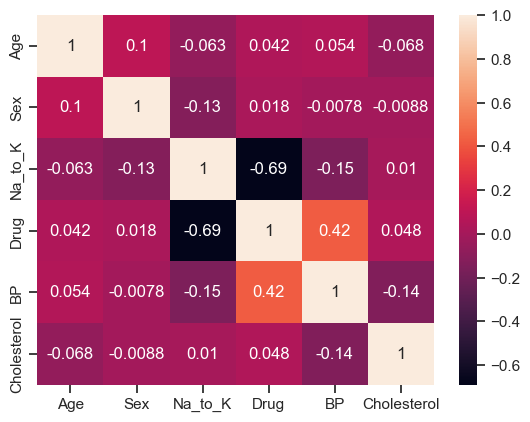

In [16]:
heatmap = sns.heatmap(corr, annot=True)

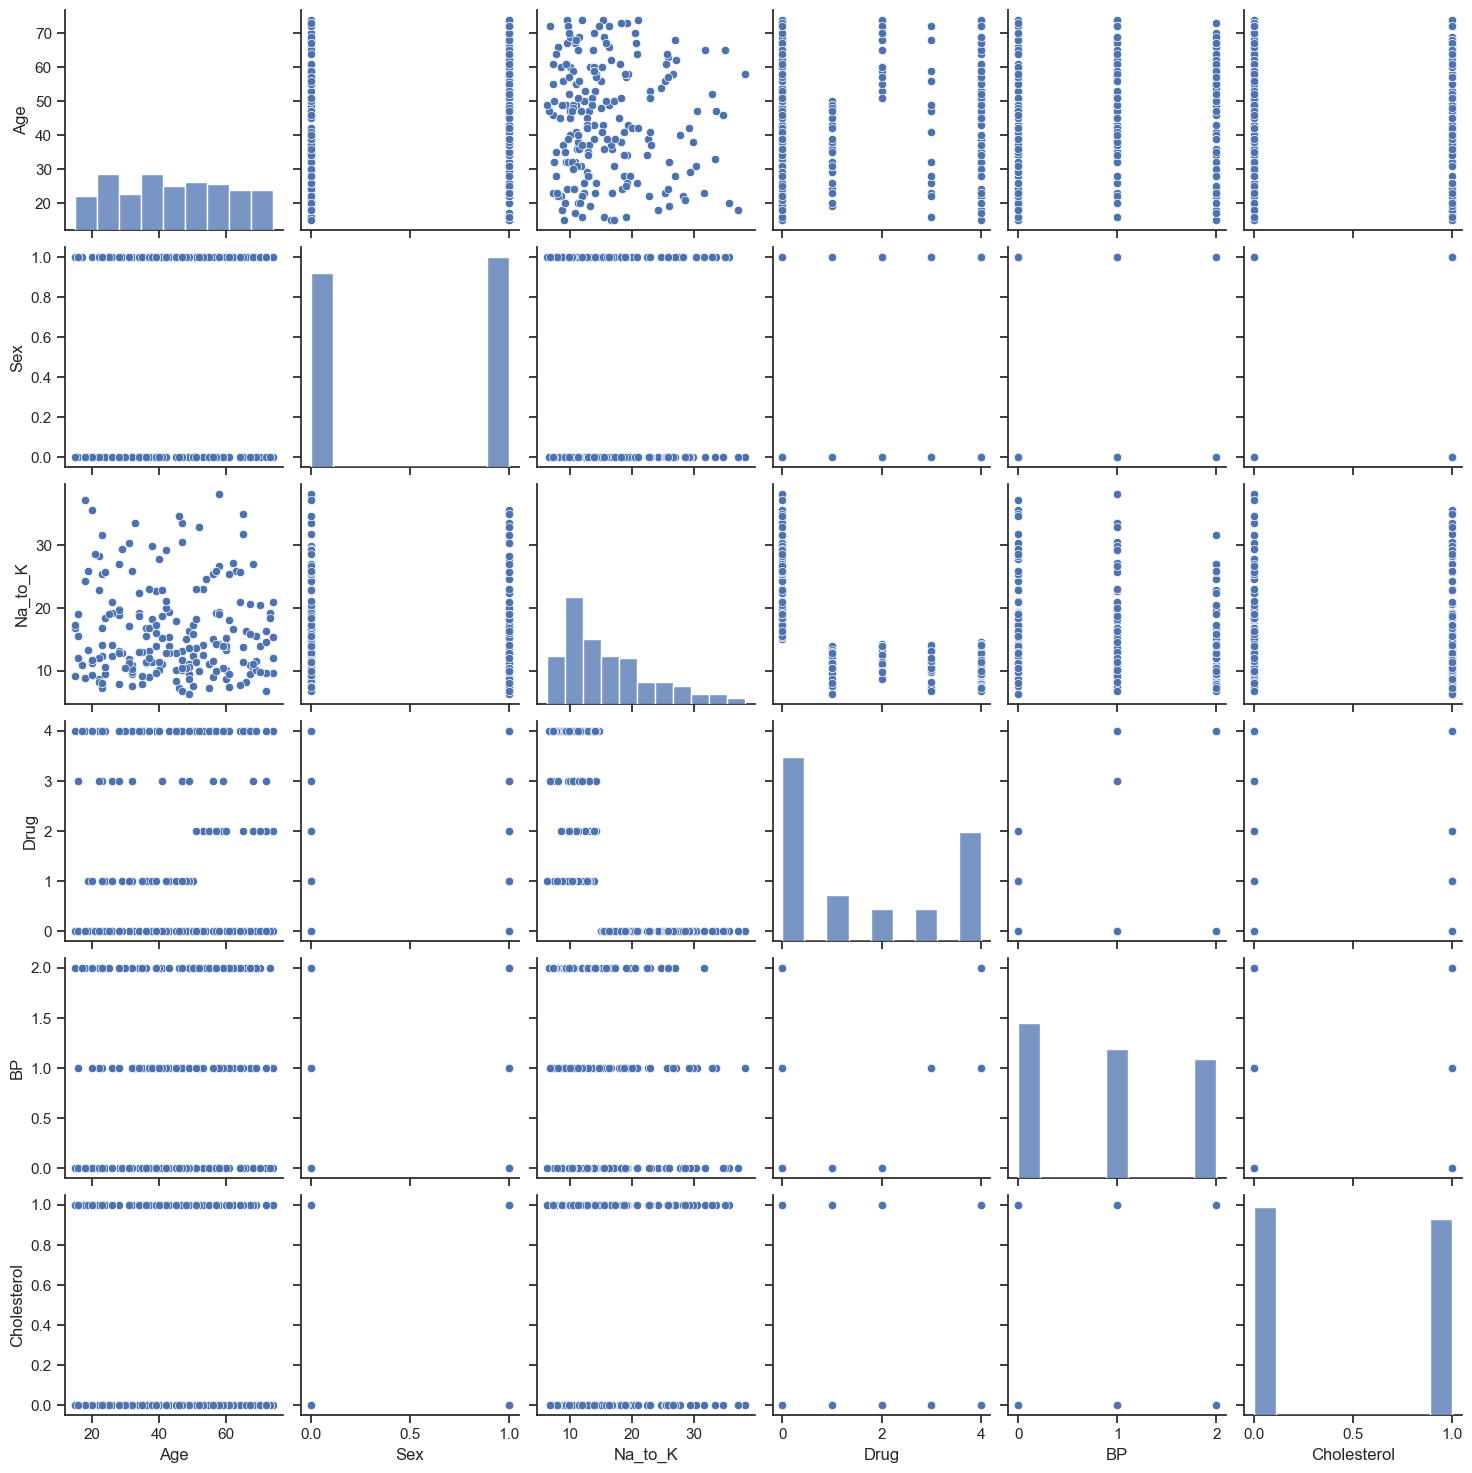

In [17]:
sns.pairplot(data=data_drugs_enc)

In [18]:
data_X = data_drugs_enc.drop("Drug", axis=1)
data_y = data_drugs_enc["Drug"]

In [19]:
lib.print_class_proportions(data_y)

Метка 	 Количество 	 Процент встречаемости
0 	 91 	 	 45.5%
1 	 23 	 	 11.5%
2 	 16 	 	 8.0%
3 	 16 	 	 8.0%
4 	 54 	 	 27.0%


In [20]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=1, stratify=data_y)

In [79]:
lib.print_class_proportions(y_train)

Метка 	 Количество 	 Процент встречаемости
0 	 73 	 	 45.62%
1 	 18 	 	 11.25%
2 	 13 	 	 8.12%
3 	 13 	 	 8.12%
4 	 43 	 	 26.88%


In [80]:
lib.print_class_proportions(y_test)

Метка 	 Количество 	 Процент встречаемости
0 	 18 	 	 45.0%
1 	 5 	 	 12.5%
2 	 3 	 	 7.5%
3 	 3 	 	 7.5%
4 	 11 	 	 27.5%


1. Логистическая регрессия

In [97]:
log_reg = LogisticRegression(multi_class="multinomial")

In [100]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [10, 100, 1000, 10000, 100000]
}

grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring="r2")

grid_search.fit(X_train, y_train)

c:\Users\Lenovo\Desktop\BMSTU\SEM_6\TMO\labs-proj\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Lenovo\Desktop\BMSTU\SEM_6\TMO\labs-proj\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

GridSearchCV(cv=5, estimator=LogisticRegression(multi_class='multinomial'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [10, 100, 1000, 10000, 100000]},
             scoring='r2')

In [101]:
print("best_params_:", grid_search.best_params_)

print("best_score_:", grid_search.best_score_)

best_params_: {'C': 10, 'max_iter': 1000}
best_score_: 0.9717006802721088


In [102]:
log_reg = LogisticRegression(multi_class="multinomial", C=grid_search.best_params_["C"],
                             max_iter=grid_search.best_params_["max_iter"])

In [103]:
log_reg.fit(X_train, y_train)

c:\Users\Lenovo\Desktop\BMSTU\SEM_6\TMO\labs-proj\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, max_iter=1000, multi_class='multinomial')

In [104]:
reg_pred = log_reg.predict(X_test)

In [105]:
reg_pred

array([2, 0, 4, 0, 4, 3, 4, 4, 2, 0, 0, 0, 4, 0, 1, 0, 0, 2, 1, 3, 0, 3,
       0, 4, 0, 4, 0, 0, 0, 4, 1, 0, 0, 1, 4, 0, 4, 0, 1, 0])

In [106]:
accuracy_score(y_test, reg_pred)

0.975

In [107]:
lib.print_accuracy_score_for_classes(y_test, reg_pred)

Метка 	 Accuracy
0 	 1.0
1 	 1.0
2 	 1.0
3 	 1.0
4 	 0.9090909090909091


In [108]:
confusion_matrix(y_test, reg_pred)

array([[18,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  3,  0],
       [ 1,  0,  0,  0, 10]], dtype=int64)

In [109]:
lib.test_model(log_reg, y_test, X_test)

mean_absolute_error: 0.1
median_absolute_error: 0.0
r2_score: 0.8639455782312926


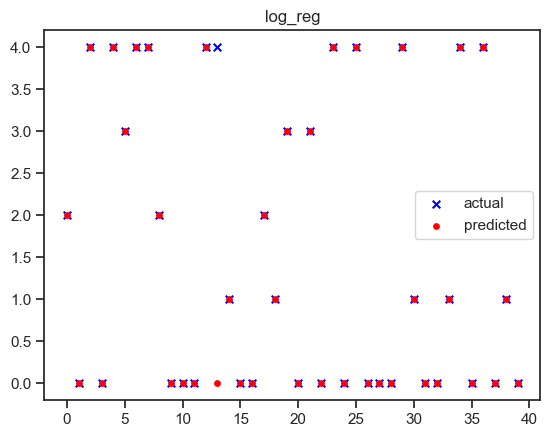

In [110]:
lib.actual_predicted_scatter(y_test, reg_pred, "log_reg")

In [111]:
x_array = data_X["Na_to_K"].values
y_array = data_y.values

b0, b1 = lib.analytic_regr_coef(x_array, y_array)

In [112]:
(b1, log_reg.coef_), (b0, log_reg.intercept_)

((-0.16370838916219083,
  array([[ 0.02433252,  0.93544162,  3.55268764,  0.99698223,  0.883202  ],
         [-0.12337287,  0.06314643, -0.98645981, -4.66524947, -1.82469617],
         [ 0.18875118, -0.62565489, -0.49806182, -4.45960053,  0.05682321],
         [-0.05014248,  0.10185544, -1.03570429,  1.45698816, -3.1054321 ],
         [-0.03956835, -0.47478861, -1.03246172,  6.67087962,  3.99010305]])),
 (4.228165129853421,
  array([-50.80406896,  22.58305428,   0.40049537,  17.72538302,
          10.09513629])))

2. Метод опорных векторов

In [31]:
from sklearn.svm import SVC

svc = SVC(kernel="rbf")

In [32]:
param_grid = {'C':[10, 100, 1000, 1e4, 1e5, 1e6]}
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(data_X, data_y)
grid_search.best_params_

{'C': 1000}

In [33]:
svc = SVC(kernel="rbf", C=grid_search.best_params_["C"])

In [34]:
svc.fit(X_train, y_train)

SVC(C=1000)

In [35]:
svc_pred = svc.predict(X_test)

In [36]:
lib.print_accuracy_score_for_classes(y_test, svc_pred)

Метка 	 Accuracy
0 	 1.0
1 	 1.0
2 	 1.0
3 	 1.0
4 	 1.0


In [37]:
lib.test_model(svc, y_test, X_test)

mean_absolute_error: 0.0
median_absolute_error: 0.0
r2_score: 1.0


In [38]:
confusion_matrix(y_test, svc_pred)

array([[18,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  3,  0],
       [ 0,  0,  0,  0, 11]], dtype=int64)

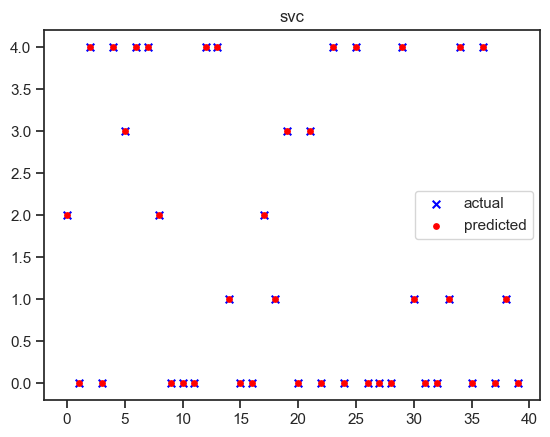

In [39]:
lib.actual_predicted_scatter(y_test, svc_pred, 'svc')

3. Дерево решений

In [40]:
tree_cl = DecisionTreeClassifier(random_state=1)

In [41]:
tree_cl.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [42]:
tree_pred = tree_cl.predict(X_test)

In [43]:
lib.print_accuracy_score_for_classes(y_test, tree_pred)

Метка 	 Accuracy
0 	 1.0
1 	 1.0
2 	 1.0
3 	 1.0
4 	 0.9090909090909091


In [44]:
lib.test_model(tree_cl, y_test, X_test)

mean_absolute_error: 0.1
median_absolute_error: 0.0
r2_score: 0.8639455782312926


In [45]:
confusion_matrix(y_test, tree_pred)

array([[18,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  3,  0],
       [ 1,  0,  0,  0, 10]], dtype=int64)

In [46]:
tree_rules = export_text(tree_cl, feature_names=list(data_X.columns))
HTML('<pre>' + tree_rules + '</pre>')

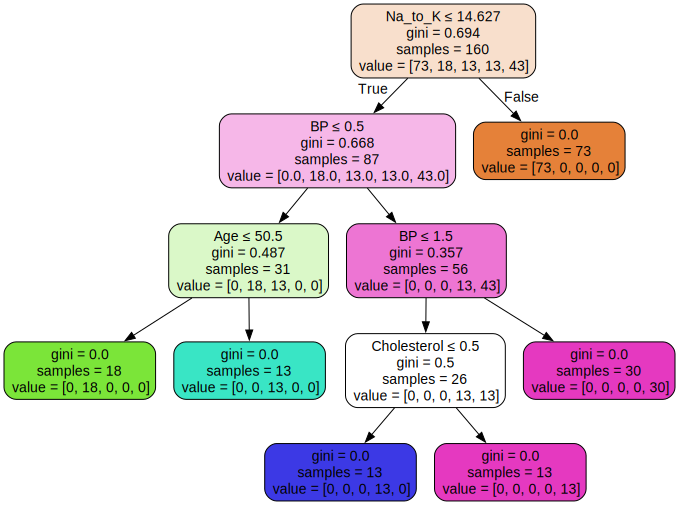

In [47]:
dot_data = export_graphviz(tree_cl, out_file=None, 
                           feature_names=list(data_X.columns),
                           filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)
graph

In [48]:
list(zip(data_X.columns.values, tree_cl.feature_importances_))

[('Age', 0.13600697471665216),
 ('Sex', 0.0),
 ('Na_to_K', 0.4762348555452004),
 ('BP', 0.2706410526210303),
 ('Cholesterol', 0.11711711711711713)]

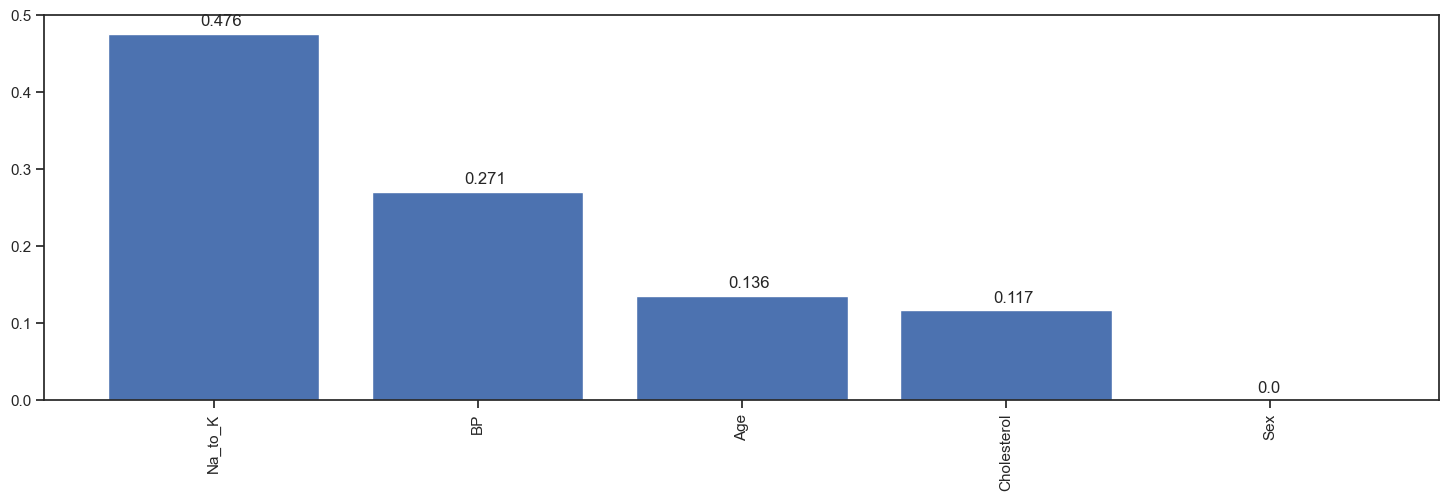

(['Na_to_K', 'BP', 'Age', 'Cholesterol', 'Sex'],
 [0.4762348555452004,
  0.2706410526210303,
  0.13600697471665216,
  0.11711711711711713,
  0.0])

In [49]:
lib.draw_feature_importances(tree_cl, data_X)

In [117]:
tree_cl.get_depth()

4

In [118]:
tree_cl.get_n_leaves()

6

In [50]:
model = [log_reg, svc, tree_cl]
model_names = ["log_reg", "svc", "tree_cl"]

for i in range(len(model)):
    model_name = model_names[i]
    print(f"{model_name} result:")
    lib.test_model(model[i], y_test, X_test)
    print("\n")

log_reg result:
mean_absolute_error: 0.05
median_absolute_error: 0.0
r2_score: 0.9659863945578231


svc result:
mean_absolute_error: 0.0
median_absolute_error: 0.0
r2_score: 1.0


tree_cl result:
mean_absolute_error: 0.1
median_absolute_error: 0.0
r2_score: 0.8639455782312926


